In [7]:
import matplotlib

In [38]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import os

In [47]:
df = pd.read_csv("ATom2_flight_tracks.csv", skiprows = 13)

df

,#index,RF,YYYYMMDD,UTC_Start,UTC_Stop,Latitude,Longitude,Altitude (m masl GPS),P (hPa),T(K),CumDist (km)
0,A2_00001,1,20170126,61910.0,61920.0,34.630809,-118.109519,816.9700,934.4990,275.2500,0.846280
1,A2_00002,1,20170126,61920.0,61930.0,34.630301,-118.119161,905.9000,923.4450,274.8800,1.703446
2,A2_00003,1,20170126,61930.0,61940.0,34.629948,-118.129058,968.8200,916.5830,274.4730,2.644904
3,A2_00004,1,20170126,61940.0,61950.0,34.629845,-118.138902,1008.5300,912.1750,274.2550,3.563139
4,A2_00005,1,20170126,61950.0,61960.0,34.630970,-118.149192,1076.0700,904.6270,273.8240,4.482312
...,...,...,...,...,...,...,...,...,...,...,...
34074,A2_34075,11,20170221,85680.0,85690.0,34.633635,-118.059382,867.9900,924.9070,286.5330,69813.417000
34075,A2_34076,11,20170221,85690.0,85700.0,34.633195,-118.066727,833.0900,928.8890,286.8430,69814.067000
34076,A2_34077,11,20170221,85700.0,85710.0,34.632753,-118.074153,800.8000,933.1160,287.2090,69814.777000
34077,A2_34078,11,20170221,85710.0,85720.0,34.632346,-118.081486,786.9500,935.3910,287.4600,69815.377000


In [10]:
df['RF'].unique()

df.tail()

,#index,RF,YYYYMMDD,UTC_Start,UTC_Stop,Latitude,Longitude,Altitude (m masl GPS),P (hPa),T(K),CumDist (km)
34074,A2_34075,11,20170221,85680.0,85690.0,34.633635,-118.059382,867.9900,924.9070,286.5330,69813.417
34075,A2_34076,11,20170221,85690.0,85700.0,34.633195,-118.066727,833.0900,928.8890,286.8430,69814.067
34076,A2_34077,11,20170221,85700.0,85710.0,34.632753,-118.074153,800.8000,933.1160,287.2090,69814.777
34077,A2_34078,11,20170221,85710.0,85720.0,34.632346,-118.081486,786.9500,935.3910,287.4600,69815.377
34078,A2_34079,11,20170221,85720.0,85730.0,34.632036,-118.086841,787.4875,935.5175,287.5325,69815.809


In [11]:
color_mapping = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'cyan',
    5: 'magenta',
    6: 'yellow',
    7: 'orange',
    8: 'purple',
    9: 'brown',
    10: 'pink',
    11: 'gray'
    # Add more mappings as needed
}

In [5]:
df['Longitude'] = df['Longitude'].apply(lambda lon: lon + 360 if lon < -180 else lon)

map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

grouped = df.groupby('RF')

# Iterate through each group
for group_name, group_df in grouped:
    # Create a list to store the line coordinates for the current group
    line_coordinates = []

    # Iterate through the group DataFrame and add coordinates to the list
    for index, row in group_df.iterrows():
        line_coordinates.append([row['Latitude'], row['Longitude']])
    line_color = color_mapping.get(group_df['RF'].iloc[0], 'black')
    print(group_df['RF'].iloc[0])
    # Create a PolyLine using the line coordinates for the current group
    folium.PolyLine(line_coordinates, color=line_color, weight=2.5, opacity=1).add_to(map)

# Display the map
map



NameError: name 'df' is not defined

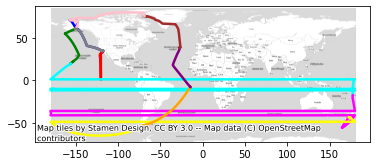

In [28]:
# keep broken shit for reference ig
# Adjust the longitude values to handle International Date Line crossing
df['Longitude'] = df['Longitude'].apply(lambda lon: lon + 360 if lon < -180 else lon)

# Create a GeoDataFrame from the latitude, longitude, and RF columns
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Swap latitude and longitude columns in the GeoDataFrame
gdf = gdf.rename(columns={'Latitude': 'Longitude', 'Longitude': 'Latitude'})

# Set the coordinate reference system (CRS) for the GeoDataFrame
gdf.crs = 'EPSG:4326'  # Assuming the data is in WGS84 (EPSG:4326)
# Create a plot
fig, ax = plt.subplots()

# Iterate through each group
for group_name, group_df in gdf.groupby('RF'):
    # Create a list to store the line coordinates for the current group
    line_coordinates = []

    # Iterate through the group GeoDataFrame and add coordinates to the list
    for index, row in group_df.iterrows():
        line_coordinates.append([row['Latitude'], row['Longitude']])

    # Get the color for the current group based on the RF value
    line_color = color_mapping.get(group_df['RF'].iloc[0], 'black')

    # Plot the PolyLine using the line coordinates for the current group
    ax.plot(*zip(*line_coordinates), color=line_color, linewidth=2.5)
# Set the map background using contextily
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# Show the plot
plt.show()

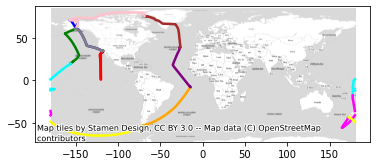

In [37]:
# Adjust the longitude values to handle International Date Line crossing
df['Longitude'] = df['Longitude'].apply(lambda lon: lon + 360 if lon < -180 else lon)

# Normalize the longitude values to the range [-180, 180]
df['Longitude'] = df['Longitude'].apply(lambda lon: lon - 360 if lon > 180 else lon)

# Create a GeoDataFrame from the latitude, longitude, and RF columns
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)
# Set the coordinate reference system (CRS) for the GeoDataFrame
gdf.crs = 'EPSG:4326'  # Assuming the data is in WGS84 (EPSG:4326)

# Create a plot
fig, ax = plt.subplots()
# Iterate through each group
for group_name, group_df in gdf.groupby('RF'):
    # Create a list to store the line coordinates for the current group
    line_coordinates = []
    current_line = []
    
    # Iterate through the group GeoDataFrame and add coordinates to the list
    for index, row in group_df.iterrows():
        if len(current_line) > 0:
            prev_lon = current_line[-1][0]
            lon = row['Longitude']
            # Check if a new line segment needs to be created due to crossing the meridian
            if abs(lon - prev_lon) > 180:
                line_coordinates.append(current_line)
                current_line = []
        current_line.append([row['Longitude'], row['Latitude']])  # Swap latitude and longitude

    line_coordinates.append(current_line)  # Add the last line segment
    
    # Get the color for the current group based on the RF value
    line_color = color_mapping.get(group_df['RF'].iloc[0], 'black')

    # Plot each line segment for the current group
    for line in line_coordinates:
        ax.plot(*zip(*line), color=line_color, linewidth=2.5)

# Set the map background using contextily
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# Show the plot
plt.show()


In [41]:
shapefolder_path = '/Users/annievoigt/Documents/Work/ds2s_fuckrnd/Annie/shapefile_out'

#os.makedirs(shapefolder_path, exist_ok=True)
#output_file = os.path.join(shapefolder_path, 'lines.shp')

gdf.to_file(output_file)

/var/folders/sm/0wyvgbvs621_38tv5vl2t1dh0000gn/T/ipykernel_4154/89354401.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_file)


In [52]:
max_values = df.groupby('RF')['UTC_Stop'].max()

# Find the minimum value for each unique identifier
min_values = df.groupby('RF')['UTC_Start'].min()

# Print the maximum and minimum values for each unique identifier
for identifier, max_value in max_values.items():
    min_value = min_values[identifier]
    print(f"RF: {identifier}, Max Value: {max_value}, Min Value: {min_value}")

RF: 1, Max Value: 99130.0, Min Value: 61910.0
RF: 2, Max Value: 98510.0, Min Value: 63570.0
RF: 3, Max Value: 102020.0, Min Value: 72550.0
RF: 4, Max Value: 102470.0, Min Value: 68390.0
RF: 5, Max Value: 104860.0, Min Value: 73940.0
RF: 6, Max Value: 103600.0, Min Value: 68060.0
RF: 7, Max Value: 72090.0, Min Value: 39670.0
RF: 8, Max Value: 62980.0, Min Value: 31880.0
RF: 9, Max Value: 60740.0, Min Value: 33910.0
RF: 10, Max Value: 86570.0, Min Value: 59150.0
RF: 11, Max Value: 85730.0, Min Value: 64880.0


In [54]:
df['Max_Value'] = df.groupby('RF')['UTC_Stop'].transform('max')
df['Min_Value'] = df.groupby('RF')['UTC_Start'].transform('min')


In [55]:
df.head()

,#index,RF,YYYYMMDD,UTC_Start,UTC_Stop,Latitude,Longitude,Altitude (m masl GPS),P (hPa),T(K),CumDist (km),Max_Value,Min_Value
0,A2_00001,1,20170126,61910.0,61920.0,34.630809,-118.109519,816.97,934.499,275.250,0.846280,99130.0,61910.0
1,A2_00002,1,20170126,61920.0,61930.0,34.630301,-118.119161,905.90,923.445,274.880,1.703446,99130.0,61910.0
2,A2_00003,1,20170126,61930.0,61940.0,34.629948,-118.129058,968.82,916.583,274.473,2.644904,99130.0,61910.0
3,A2_00004,1,20170126,61940.0,61950.0,34.629845,-118.138902,1008.53,912.175,274.255,3.563139,99130.0,61910.0
4,A2_00005,1,20170126,61950.0,61960.0,34.630970,-118.149192,1076.07,904.627,273.824,4.482312,99130.0,61910.0


In [60]:
# Read the shapefile and create a GeoDataFrame

shapefolder_path = '/Users/annievoigt/Documents/Work/ds2s_fuckrnd/Annie/shapefile_out'
shape_file = os.path.join(shapefolder_path, 'lines.shp')
shapefile_gdf = gpd.read_file(shape_file)
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
shapefile_gdf['geom'] = shapefile_gdf['geometry']
# Associate the shapefile's data with the GeoDataFrame
merged_gdf = gpd.GeoDataFrame(pd.concat([gdf, shapefile_gdf], axis=1))

# Print the updated GeoDataFrame
print(merged_gdf)

ValueError: GeoDataFrame does not support multiple columns using the geometry column name 'geometry'.